In [1]:
from f_global import *
from data_clean import *
from visualisation import *
from arima import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
ethereum_day = read_copy_csv("data/ETHUSD_day.csv")

In [3]:
df_info(ethereum_day)


        Longueur du dataset : 1828 enregistrements
        Nombre de colonnes : 8
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
Unix Timestamp,float64,"[1620620000000.0, 1620530000000.0, 16204500000...",0.0,0,1828
Date,object,"['10-05-2021 04:00', '09-05-2021 04:00', '08-0...",0.0,0,1828
Symbol,object,"['ETHUSD', 'ETHUSD', 'ETHUSD', 'ETHUSD', 'ETHU...",0.0,0,1
Open,float64,"[4060.21, 3874.49, 3539.73, 3427.49, 3478.06]",0.0,0,1738
High,float64,"[4345.44, 4077.7, 3968.37, 3595.0, 3598.05]",0.0,0,1690
Low,float64,"[3500.0, 3725.0, 3512.13, 3355.01, 3402.01]",0.0,0,1667
Close,float64,"[3924.7, 4060.21, 3874.49, 3539.73, 3427.49]",0.0,0,1725
Volume,float64,"[49801.118780000004, 23638.51668, 25676.87443,...",0.0,0,1805


In [4]:
ethereum_day =cleaning(ethereum_day, ['Unix Timestamp', 'Symbol'], ['Date', 'Opening_Price_ETH', 'Highest_Price_ETH', 'Lowest_Price_ETH', 'Closure_price_ETH', 'Vol_ETH'], 'Date', "data/ethereum_day_clean.csv", "UTF-8")

In [5]:
ethereum_day

,Opening_Price_ETH,Highest_Price_ETH,Lowest_Price_ETH,Closure_price_ETH,Vol_ETH
Date,,,,,
2016-05-09,0.00,12.00,0.000,9.36,1.376615e+03
2016-05-10,9.36,9.95,9.360,9.74,7.646283e+02
2016-05-11,9.74,10.47,9.690,10.45,3.079531e+03
2016-05-12,10.45,12.00,9.920,10.40,2.061012e+03
2016-05-13,10.40,11.59,10.200,10.50,1.788043e+03
2016-05-14,10.50,10.58,10.010,10.57,9.305807e+02
2016-05-15,10.57,10.59,10.060,10.06,9.885320e+02
2016-05-16,10.06,11.41,10.060,11.33,3.725048e+03
2016-05-17,11.33,13.06,11.280,13.04,8.137008e+03


In [6]:
ethereum_day_opening_price = new_df_replace_value(ethereum_day, 'Opening_Price_ETH','2016-05-09', 'Opening_Price_ETH',  9.57)

In [7]:
ethereum_day_opening_price

,Opening_Price_ETH
Date,
2016-05-09,9.57
2016-05-10,9.36
2016-05-11,9.74
2016-05-12,10.45
2016-05-13,10.40
2016-05-14,10.50
2016-05-15,10.57
2016-05-16,10.06
2016-05-17,11.33


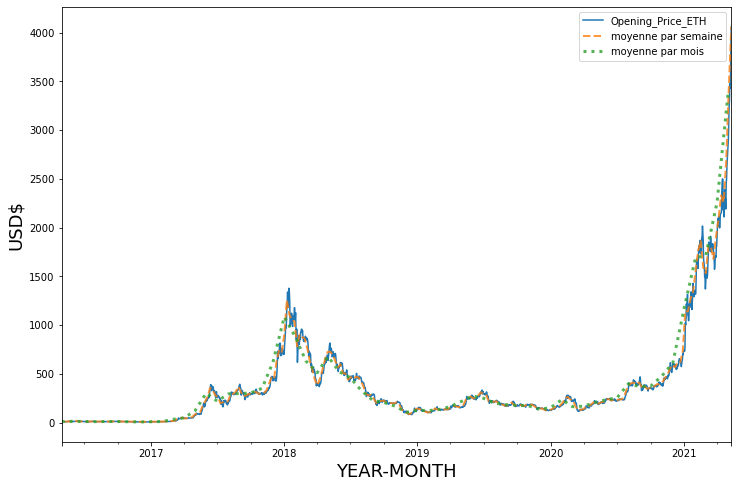

In [8]:
plot(ethereum_day_opening_price, '2016', '2021', 'Opening_Price_ETH', 'USD$')

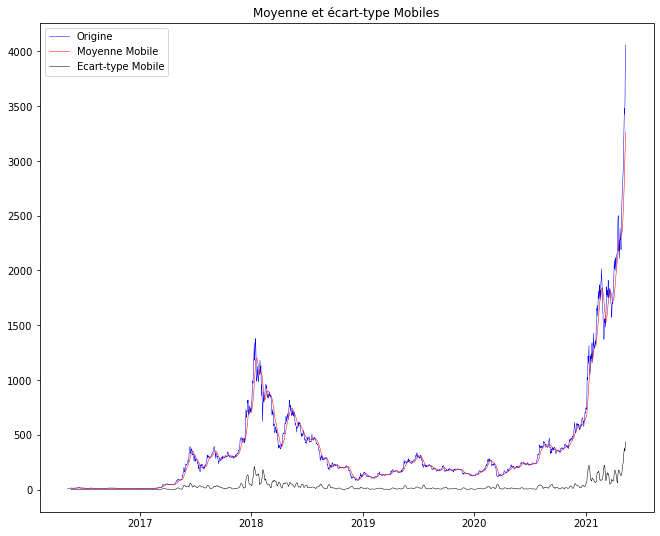

Statistiques ADF : 4.727755049887502
p-value : 1.0
Valeurs Critiques :
	1%: -3.4339840952648695
	5%: -2.8631452508003057
	10%: -2.567624583142913


In [9]:
if_stationarity(ethereum_day_opening_price)

In [10]:
ethereum_log = np.log(ethereum_day_opening_price)

In [11]:
y, train, test = train_test(ethereum_log, 0.66)

Train : (1206, 1), Test : (622, 1)


In [12]:
auto_arima(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3281.087, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3284.686, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3283.081, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3283.091, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3284.777, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.923 seconds
-3284.7766057835724


In [13]:
model_fit = fit_summary(ARIMA, train, (0, 1, 0), 'D')

                              ARIMA Model Results                              
Dep. Variable:     D.Opening_Price_ETH   No. Observations:                 1205
Model:                  ARIMA(0, 1, 0)   Log Likelihood                1644.343
Method:                            css   S.D. of innovations              0.062
Date:                 Mon, 28 Jun 2021   AIC                          -3284.686
Time:                         09:23:44   BIC                          -3274.497
Sample:                     05-10-2016   HQIC                         -3280.849
                          - 08-27-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.002      1.382      0.167      -0.001       0.006


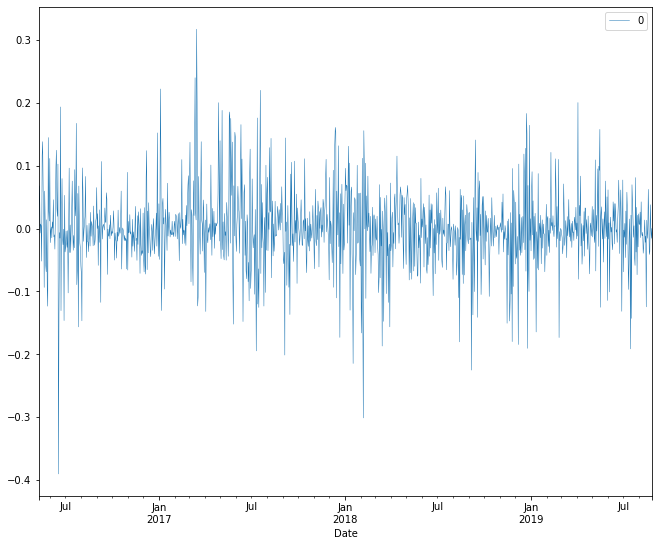

In [14]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

In [15]:
pred = predict(model_fit, '2016-05-21', '2021-06-01', 'ARIMA Predictions')

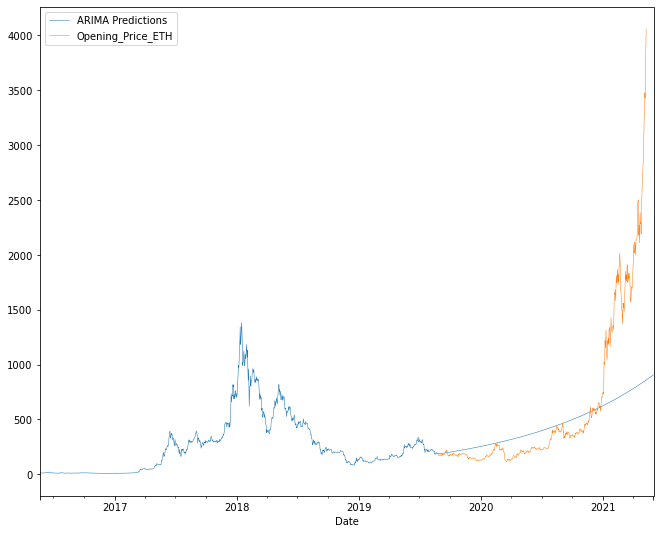

In [16]:
vis_predict(pred, test, 'Opening_Price_ETH')

Date de début de prédiction qui ne dépasse pas le 28 aout 2019 :2019-06-10
Date de fin de prédiction :2019-06-23


KeyError: '2019-06-23'

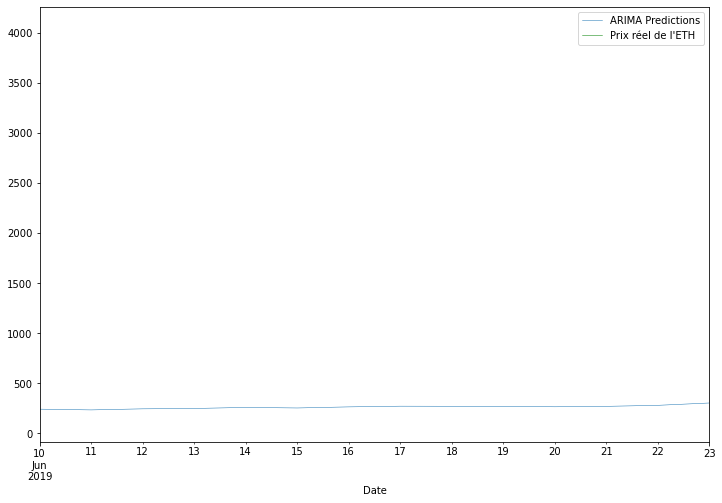

In [17]:
predict_future_price_ETH(model_fit, test)